<a href="https://colab.research.google.com/github/laurencefrank/Applied-Text-Mining/blob/main/ATM_P1_Monday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Applied Text Mining, Utrecht Summerschool 26 - 29 July 2021


### Monday 26 July, practical 1

In [1]:
a = "Hello @Text Mining World! I'm here to learn everything, right?"

In [2]:
print(a)

Hello @Text Mining World! I'm here to learn everything, right?


In [3]:
print(a[0])

H


In [4]:
print(a[-1])

?


In [6]:
!pip install numpy 

In [8]:
! pip install string 

ERROR: Could not find a version that satisfies the requirement string (from versions: none)
ERROR: No matching distribution found for string


In [9]:
!pip install nltk
!pip install gensim
!pip install spacy

In [12]:
import numpy as np
import nltk
import gensim
import spacy
import string

In [25]:
print(a)
b = a.lower()
print(b)

Hello @Text Mining World! I'm here to learn everything, right?
hello @text mining world! i'm here to learn everything, right?


In [27]:
q = []
print(string.punctuation)
for i in b:
  if i in string.punctuation:
    q.append(i)
print(q)

['@', '!', "'", ',', '?']


In [30]:
c = ""
for x in b:
    if x not in q:
        c=c+x

print(c)
# Note that I'm becomes im !?

hello text mining world im here to learn everything right


In [39]:
# Now with list comprehension
c = "".join([punct for punct in b if punct not in string.punctuation])
print(c)

hello text mining world im here to learn everything right


In [33]:
#from nltk.tokenize import word_tokenize

In [37]:
from nltk.tokenize import word_tokenize
# download the punkt model
nltk.download('punkt')

In [38]:
print(word_tokenize(b))
print(word_tokenize(c))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['hello', '@', 'text', 'mining', 'world', '!', 'i', "'m", 'here', 'to', 'learn', 'everything', ',', 'right', '?']
['hello', 'text', 'mining', 'world', 'im', 'here', 'to', 'learn', 'everything', 'right']


In [41]:
from nltk.tokenize import RegexpTokenizer

In [42]:
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(b)

['hello',
 'text',
 'mining',
 'world',
 'i',
 'm',
 'here',
 'to',
 'learn',
 'everything',
 'right']

In [43]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(b))
print(sent_tokenize(c))

['hello @text mining world!', "i'm here to learn everything, right?"]
['hello text mining world im here to learn everything right']


## Pre-processing a text corpus (data set)

Pre-processing a data set is similar to pre-processing simple text strings. First, we need to get some data. For this, we can use our own data set, or we can scrape data from web or use social media APIs. There are also some websites with publicly available data sets:

CLARIN Resource Families: https://www.clarin.eu/portal
UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets.php?format=&task=&att=&area=&numAtt=&numIns=&type=text&sort=nameUp&view=table
Kaggle: https://www.kaggle.com/
Here, we want to analyze and pre-process the Taylor Swift song lyrics data from all her albums. We downloaded this data set from the Kaggle website and put that already in the data folder. Here is the link to the original data set: https://www.kaggle.com/PromptCloudHQ/taylor-swift-song-lyrics-from-all-the-albums

In [50]:
import pandas as pd 

In [51]:
from google.colab import files
uploaded = files.upload()

Saving taylor_swift_lyrics.csv to taylor_swift_lyrics.csv


In [52]:
import io
ts_lyrics = pd.read_csv(io.BytesIO(uploaded['taylor_swift_lyrics.csv']))

In [53]:
ts_lyrics.head()

,Artist,Album,Title,Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan..."
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ..."
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca..."
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...


In [54]:
ts_lyrics.tail()

,Artist,Album,Title,Lyrics
127,Taylor Swift,folklore,mad woman,What did you think I'd say to that?\nDoes a sc...
128,Taylor Swift,folklore,epiphany,"Keep your helmet\nKeep your life, son\nJust a ..."
129,Taylor Swift,folklore,betty,"Betty, I won't make assumptions about why you ..."
130,Taylor Swift,folklore,peace,Our coming of age has come and gone\nSuddenly ...
131,Taylor Swift,folklore,hoax,My only one\nMy smoking gun\nMy eclipsed sun\n...


In [55]:
ts_lyrics.iloc[0]

Artist                                         Taylor Swift 
Album                                          Taylor Swift 
Title                                             Tim McGraw
Lyrics     He said the way my blue eyes shinx\nPut those ...
Name: 0, dtype: object

In [56]:
ts_lyrics.head(1)

,Artist,Album,Title,Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...


In [57]:
import re
def remove_linebreaks(text):
    """custom function to remove the line breaks"""
    return re.sub(r'\n', ' ', text)

ts_lyrics["Preprocessed Lyrics"] = ts_lyrics["Lyrics"].apply(lambda text: remove_linebreaks(text))
ts_lyrics.head()

,Artist,Album,Title,Lyrics,Preprocessed Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,He said the way my blue eyes shinx Put those G...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...","State the obvious, I didn't get my perfect fan..."
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...","Drew looks at me, I fake a smile so he won't s..."
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...","I don't know what I want, so don't ask me 'Cau..."
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,You have a way of coming easily to me And when...


In [58]:
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', string.punctuation))

ts_lyrics["Preprocessed Lyrics"] = ts_lyrics["Preprocessed Lyrics"].apply(lambda text: remove_punctuation(text))
ts_lyrics.head()

,Artist,Album,Title,Lyrics,Preprocessed Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,He said the way my blue eyes shinx Put those G...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...",State the obvious I didnt get my perfect fanta...
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...",Drew looks at me I fake a smile so he wont see...
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...",I dont know what I want so dont ask me Cause I...
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,You have a way of coming easily to me And when...


In [59]:
ts_lyrics["Preprocessed Lyrics"] = ts_lyrics["Preprocessed Lyrics"].str.lower()
ts_lyrics.head()

,Artist,Album,Title,Lyrics,Preprocessed Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,he said the way my blue eyes shinx put those g...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...",state the obvious i didnt get my perfect fanta...
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...",drew looks at me i fake a smile so he wont see...
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...",i dont know what i want so dont ask me cause i...
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,you have a way of coming easily to me and when...


In [60]:
from collections import Counter

# To get all lyrics in one text, you can concatenate all of them using the " ".join(list) syntax, 
# which joins all elements in a list separating them by whitespace.
text = " ".join(lyric for lyric in ts_lyrics["Preprocessed Lyrics"])

# split() returns list of all the words in the string
split_it = text.split()
  
# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)
  
# most_common() produces k frequently encountered input values and their respective counts.
most_occur = Counter.most_common(20)
  
print(most_occur)

[('i', 2377), ('you', 2319), ('the', 1623), ('and', 1403), ('me', 885), ('to', 843), ('a', 787), ('in', 686), ('it', 674), ('my', 642), ('of', 492), ('your', 475), ('we', 441), ('that', 436), ('all', 436), ('but', 428), ('like', 406), ('im', 404), ('this', 394), ('know', 380)]


In [61]:
!pip install wordcloud

In [62]:
from wordcloud import WordCloud
?WordCloud

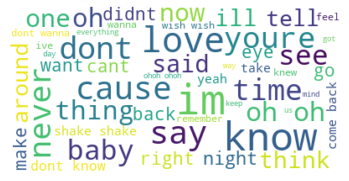

In [63]:
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [65]:
from nltk.corpus import stopwords
nltk.download('stopwords')
# run the code nltk.download('stopwords') if needed
stop_words = set(stopwords.words('english'))
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{"you'll", 'there', 'above', 'her', "that'll", 'their', 'hadn', 'wasn', 'what', 'against', 'here', 'about', 'over', 'how', 'too', 'but', 'i', 'this', "shan't", 'same', 'have', 'his', 'who', 'again', 'being', 'because', 'yourself', 'don', 'he', 'been', 'me', 'needn', 'am', 'some', 'its', "she's", 'into', 'mustn', 'yours', 'won', "wouldn't", 'can', 'hers', 'each', 'if', 'where', 'while', 'those', 'only', "won't", 'such', "doesn't", 'once', 'off', "aren't", 'on', 'shan', 'at', 'during', "mightn't", "couldn't", "you're", 'most', 'our', 'll', 'you', 'out', 'shouldn', 'the', 'isn', 'ours', 'when', 'themselves', 'as', 'had', 'did', 'down', "didn't", 'your', 'and', 'or', 'with', 'not', 'so', "wasn't", 'aren', "shouldn't", 'mightn', 'whom', "hasn't", 'just', 'itself', 'was', 'she', 'theirs', "isn't", 'of', 'do', 'until', 'than', 'him', 'below', 'more', 'no', 'very', "weren't", 'ourselv

In [66]:
stop_words.update(["im", "youre", "id", "dont", "cant", "didnt", "ive", "ill", "hasnt"])
# stop_words.discard('word') # this is when you want to remove a word from the list
print(stop_words)

{"you'll", 'there', 'above', 'her', "that'll", 'their', 'hadn', 'wasn', 'what', 'against', 'here', 'about', 'over', 'how', 'too', 'but', 'i', 'this', "shan't", 'hasnt', 'same', 'have', 'his', 'who', 'again', 'being', 'im', 'because', 'yourself', 'don', 'he', 'been', 'ive', 'me', 'needn', 'am', 'some', 'its', "she's", 'into', 'mustn', 'didnt', 'yours', 'won', "wouldn't", 'can', 'hers', 'each', 'if', 'where', 'while', 'those', 'only', "won't", 'such', "doesn't", 'once', 'off', "aren't", 'on', 'shan', 'cant', 'at', 'during', 'youre', "mightn't", "couldn't", "you're", 'most', 'our', 'id', 'll', 'you', 'out', 'shouldn', 'the', 'isn', 'ours', 'when', 'themselves', 'as', 'had', 'did', 'down', "didn't", 'your', 'and', 'or', 'with', 'not', 'so', "wasn't", 'aren', "shouldn't", 'mightn', 'whom', "hasn't", 'just', 'ill', 'itself', 'was', 'she', 'theirs', "isn't", 'of', 'do', 'until', 'than', 'him', 'below', 'more', 'no', 'very', "weren't", 'ourselves', 'to', 'hasn', 'dont', 'has', 've', "you've", 

In [67]:
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stop_words])

ts_lyrics["Preprocessed Lyrics"] = ts_lyrics["Preprocessed Lyrics"].apply(lambda text: remove_stopwords(text))
ts_lyrics.head()

,Artist,Album,Title,Lyrics,Preprocessed Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,said way blue eyes shinx put georgia stars sha...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...",state obvious get perfect fantasy realize love...
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...",drew looks fake smile wont see want need every...
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...",know want ask cause still trying figure know w...
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,way coming easily take take best start fight c...


In [68]:
from collections import Counter

# To get all lyrics in one text, you can concatenate all of them using the " ".join(list) syntax, 
# which joins all elements in a list separating them by whitespace.
text = " ".join(lyric for lyric in ts_lyrics["Preprocessed Lyrics"])

# split() returns list of all the words in the string
split_it = text.split()
  
# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)
  
# most_common() produces k frequently encountered input values and their respective counts.
most_occur = Counter.most_common(20)
  
print(most_occur)

[('like', 406), ('know', 380), ('oh', 322), ('never', 294), ('love', 246), ('back', 240), ('time', 224), ('cause', 213), ('one', 177), ('say', 176), ('see', 170), ('got', 159), ('wanna', 158), ('think', 153), ('baby', 153), ('come', 150), ('go', 149), ('want', 142), ('ever', 134), ('could', 133)]


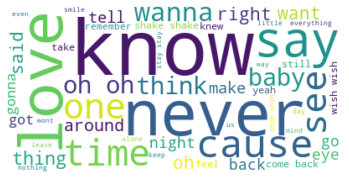

In [69]:
wordcloud = WordCloud(max_words=50, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [71]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
# run the code nltk.download('wordnet') if needed
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

ts_lyrics["Preprocessed Lyrics"] = ts_lyrics["Preprocessed Lyrics"].apply(lambda text: lemmatize_words(text))
ts_lyrics.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Artist,Album,Title,Lyrics,Preprocessed Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,said way blue eye shinx put georgia star shame...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...",state obvious get perfect fantasy realize love...
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...",drew look fake smile wont see want need everyt...
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...",know want ask cause still trying figure know w...
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,way coming easily take take best start fight c...


In [72]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

# since we applied the lemmatization, we don't apply stemming; though you can try it!
# ts_lyrics["Preprocessed Lyrics"] = ts_lyrics["Preprocessed Lyrics"].apply(lambda text: stem_words(text))
# ts_lyrics.head()

In [73]:
from nltk.stem.snowball import SnowballStemmer
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

In [74]:
from sklearn.feature_extraction.text import CountVectorizer # for bag of words feature extraction

# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.  
vectorizer1 = CountVectorizer(max_features = 3000) 

# fit_transform() does two functions: First, it fits the model and learns the vocabulary; 
# second, it transforms our data into feature vectors. 
# The input to fit_transform should be a list of strings.
dtm = vectorizer1.fit_transform(ts_lyrics["Preprocessed Lyrics"])
print(dtm.shape)

(132, 2597)


In [75]:
dtm

<132x2597 sparse matrix of type '<class 'numpy.int64'>'
	with 10530 stored elements in Compressed Sparse Row format>

In [76]:
# we can convert it to a dataframe
dtm_df = dtm.toarray()
dtm_df = pd.DataFrame(dtm_df)
dtm_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2557,2558,2559,2560,2561,2562,2563,2564,2565,2566,2567,2568,2569,2570,2571,2572,2573,2574,2575,2576,2577,2578,2579,2580,2581,2582,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [77]:
# Take a look at the words in the vocabulary
vocab = vectorizer1.get_feature_names()
print(vocab[1:100])

['16', '16th', '45', '4am', 'aah', 'abigail', 'absent', 'absurd', 'accent', 'accident', 'accused', 'ace', 'achilles', 'aching', 'acing', 'across', 'act', 'acted', 'actress', 'actually', 'add', 'adjusting', 'admit', 'adore', 'adventure', 'affair', 'afraid', 'afterglow', 'afternoon', 'age', 'ago', 'ah', 'ahah', 'ahahah', 'ahead', 'ahh', 'aim', 'aint', 'air', 'airplane', 'aisle', 'album', 'aligned', 'alive', 'alls', 'almost', 'alone', 'along', 'alpha', 'already', 'alright', 'altar', 'always', 'ambition', 'amen', 'american', 'americana', 'amnesia', 'amount', 'andi', 'ane', 'angel', 'angry', 'another', 'answer', 'anthem', 'anther', 'anticipation', 'anybody', 'anymore', 'anyone', 'anything', 'anyway', 'anywhere', 'apart', 'apartment', 'apology', 'applause', 'archer', 'architect', 'arent', 'argue', 'arm', 'armor', 'around', 'arrowhead', 'ash', 'aside', 'ask', 'asked', 'asking', 'asleep', 'assume', 'assumption', 'ate', 'ateam', 'attached', 'attack', 'attitude']


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer2 = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer2.fit_transform(ts_lyrics["Preprocessed Lyrics"])

# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

(132, 2597)


In [79]:
# Create TfidfVectorizer object
vectorizer3 = TfidfVectorizer(ngram_range=(1, 2))

# Generate matrix of word vectors
tfidf_matrix3 = vectorizer3.fit_transform(ts_lyrics["Preprocessed Lyrics"])

# Print the shape of tfidf_matrix
print(tfidf_matrix3.shape)

(132, 15016)


In [80]:
friends_theme_lyrics = "So no one told you life was going to be this way. Your job's a joke, you're broke, you're love life's DOA. It's like you're always stuck in second gear, When it hasn\'t been your day, your week, your month, or even your year. But, I\'ll be there for you, when the rain starts to pour. I\'ll be there for you, like I\'ve been there before. I\'ll be there for you, cause you\'re there for me too."
friends_theme_lyrics

"So no one told you life was going to be this way. Your job's a joke, you're broke, you're love life's DOA. It's like you're always stuck in second gear, When it hasn't been your day, your week, your month, or even your year. But, I'll be there for you, when the rain starts to pour. I'll be there for you, like I've been there before. I'll be there for you, cause you're there for me too."

In [81]:
friends_theme_lyrics = remove_punctuation(friends_theme_lyrics)
friends_theme_lyrics = friends_theme_lyrics.lower()
friends_theme_lyrics = remove_stopwords(friends_theme_lyrics)
friends_theme_lyrics = lemmatize_words(friends_theme_lyrics)
friends_theme_lyrics

'one told life going way job joke broke love life doa like always stuck second gear day week month even year rain start pour like cause'

In [82]:
friends_theme_lyrics_tf = vectorizer1.transform([friends_theme_lyrics])
friends_theme_lyrics_tf.shape
dtm.shape

(132, 2597)

In [83]:
from sklearn.metrics.pairwise import cosine_similarity

# compute and print the cosine similarity matrix
cosine_sim_dtm = cosine_similarity(dtm, friends_theme_lyrics_tf)

print(cosine_sim_dtm)

[[0.07295675]
 [0.05749499]
 [0.05668202]
 [0.099573  ]
 [0.09816136]
 [0.00975761]
 [0.16365771]
 [0.11501093]
 [0.02125256]
 [0.15038123]
 [0.07792865]
 [0.09200874]
 [0.17766726]
 [0.0360492 ]
 [0.0786839 ]
 [0.1062023 ]
 [0.23829304]
 [0.08566568]
 [0.15519271]
 [0.1352231 ]
 [0.03202563]
 [0.19158319]
 [0.09043166]
 [0.19051587]
 [0.10639904]
 [0.12562973]
 [0.13526614]
 [0.1340465 ]
 [0.10332549]
 [0.14529915]
 [0.08091962]
 [0.0428993 ]
 [0.05358677]
 [0.11510231]
 [0.03928371]
 [0.05463417]
 [0.0946985 ]
 [0.0745356 ]
 [0.24685715]
 [0.07198268]
 [0.09507654]
 [0.11511347]
 [0.11136921]
 [0.10401235]
 [0.1946593 ]
 [0.15567091]
 [0.21439196]
 [0.13088543]
 [0.11021668]
 [0.09369712]
 [0.11888042]
 [0.06581261]
 [0.00903711]
 [0.21465394]
 [0.22794562]
 [0.04007421]
 [0.06975801]
 [0.05602768]
 [0.01563873]
 [0.10146346]
 [0.13488377]
 [0.1500909 ]
 [0.0521599 ]
 [0.16455472]
 [0.20490974]
 [0.17563692]
 [0.13237606]
 [0.02857238]
 [0.03055662]
 [0.17989569]
 [0.0790393 ]
 [0.00

In [84]:
import numpy as np
max_index = np.argmax(cosine_sim_dtm, axis=0)
print(cosine_sim_dtm[max_index])
max_index

[[0.24685715]]


array([38])

In [85]:
ts_lyrics.iloc[max_index]

,Artist,Album,Title,Lyrics,Preprocessed Lyrics
38,Taylor Swift,Speak Now,The Story of Us,I used to think one day we'd tell the story of...,used think one day wed tell story u met spark ...


In [86]:
ts_lyrics["Preprocessed Lyrics"].iloc[38]

'used think one day wed tell story u met spark flew instantly people would say theyre lucky one used know place spot next searching room empty seat cause lately even know page oh simple complication miscommunications lead fall many thing wish knew many wall break standing alone crowded room speaking dying know killing like killing yeah know say since twist fate broke story u look lot like tragedy next chapter howd end way see nervously pulling clothes trying look busy best avoid starting think one day tell story u losing mind saw held pride like held oh scared see ending pretending nothing tell miss know never heard silence quite loud standing alone crowded room speaking dying know killing like killing yeah know say since twist fate broke story u look lot like tragedy looking like contest act like care le liked better side battle hand would lay armor youd say youd rather love fight many thing wish knew story u might ending soon standing alone crowded room speaking dying know killing li

In [87]:
friends_theme_lyrics_tfidf = vectorizer3.transform([friends_theme_lyrics])
print(friends_theme_lyrics_tfidf.shape)
print(tfidf_matrix3.shape)
# compute and print the cosine similarity matrix
cosine_sim_tfidf = cosine_similarity(tfidf_matrix3, friends_theme_lyrics_tfidf)

print(cosine_sim_tfidf)

(1, 15016)
(132, 15016)
[[0.02369657]
 [0.01318075]
 [0.01128244]
 [0.03986478]
 [0.03108815]
 [0.00181568]
 [0.02572803]
 [0.02691028]
 [0.00512609]
 [0.04532813]
 [0.01615807]
 [0.00787449]
 [0.03826574]
 [0.0068687 ]
 [0.01320367]
 [0.01245819]
 [0.09768082]
 [0.03284433]
 [0.01891928]
 [0.05104409]
 [0.00801751]
 [0.045455  ]
 [0.02005361]
 [0.04590047]
 [0.0319897 ]
 [0.01850863]
 [0.02299573]
 [0.0238499 ]
 [0.01617267]
 [0.03525199]
 [0.02914826]
 [0.01417113]
 [0.01017535]
 [0.02329621]
 [0.01165122]
 [0.00883778]
 [0.0213434 ]
 [0.01468301]
 [0.052752  ]
 [0.01398688]
 [0.02316361]
 [0.02104993]
 [0.03310764]
 [0.01013489]
 [0.04137598]
 [0.04265813]
 [0.04249053]
 [0.03391019]
 [0.02922056]
 [0.01882679]
 [0.01167784]
 [0.01196412]
 [0.00448242]
 [0.03975051]
 [0.02942139]
 [0.02500672]
 [0.0149794 ]
 [0.01541409]
 [0.00149821]
 [0.01839457]
 [0.03851785]
 [0.02703587]
 [0.01044214]
 [0.01812665]
 [0.04455981]
 [0.03015706]
 [0.03756264]
 [0.00366365]
 [0.00325763]
 [0.033311

In [88]:
max_index = np.argmax(cosine_sim_tfidf, axis=0)
print(cosine_sim_tfidf[max_index])
max_index

[[0.09768082]]


array([16])

In [89]:
ts_lyrics.iloc[max_index]

,Artist,Album,Title,Lyrics,Preprocessed Lyrics
16,Taylor Swift,Fearless,Forever & Always,"Once upon a time, I believe it was a Tuesday w...",upon time believe tuesday caught eye caught on...


In [90]:
ts_lyrics["Preprocessed Lyrics"].iloc[16]

'upon time believe tuesday caught eye caught onto something hold onto night looked eye told loved kidding cause seems thing breaking almost never speak feel welcome anymore baby happened please tell cause one second perfect halfway door stare phone still called feel low feel nothing flashback said forever always oh rain bedroom everything wrong rain rain gone cause said forever always line say something way honest made run hide like scared little boy looked eye thought knew minute sure here everything coming nothing here silence cut core going thought knew minute anymore stare phone still called feel low feel nothing flashback said forever always oh rain bedroom everything wrong rain rain gone cause said forever always mean baby think oh back baby back forget everything back baby back forget everything cause rain bedroom everything wrong rain rain gone cause said forever always oh stare phone still called feel low feel nothing flashback said forever always rain bedroom everything wrong